In [1]:
conda update anaconda-navigator


Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - anaconda-navigator


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py38_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.8.4-py38_0



conda-4.8.4          | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import numpy as np
#import nibabel as nib
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.io import loadmat


In [2]:
#1.Descargamos la imagen de las monedas utilizando el link
r=requests.get("https://cdn.shopify.com/s/files/1/1280/3657/products/GM-BA-SET01_1_e5745bf6-253a-4a83-a8d1-5d55ee691e5d_1024x1024.jpg?v=1548113518")
with open("monedas.jpg", 'wb') as f:
    f.write(r.content)
    

Press Enter to continue..


''

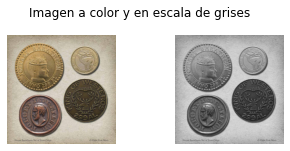

In [3]:
#2.Ahora, lo que hacemos es leer la imagen y asignarla a la variable mon
mon= io.imread("monedas.jpg")
plt.imshow(mon) 

#subplots
plt.suptitle('Imagen a color y en escala de grises')
plt.subplots_adjust(wspace=0,hspace=0)
color=plt.subplot(221) #tenemos la imagen original a color
plt.imshow(mon)
plt.axis('off')

grimon=rgb2gray(mon) #conversion a escala de grises
plt.subplot(222) 
plt.imshow(grimon,cmap='gray')#tenemos la imagen a escala de grises
plt.axis('off')

input("Press Enter to continue..")

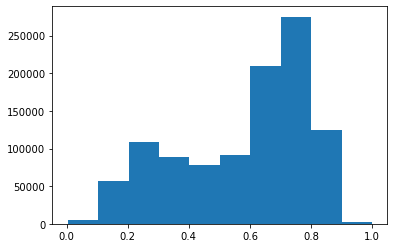

Press Enter to continue..


''

In [4]:
#3visualizamos la imagen en escala de grises y su histograma
#hgris=plt.hist(mon.flatten(), 256, [0,1]) #y acá creo el histograma de la imagen en escala de grises
hgris=plt.hist(grimon.flatten())
plt.show(hgris)

input("Press Enter to continue..")

Press Enter to continue..


''

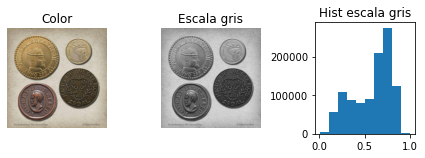

In [5]:
# 4
#subplots
plt.subplots_adjust(wspace=0,hspace=0)
plt.subplot(2,3,1)
plt.imshow(mon)
plt.axis('off')
plt.title('Color')

plt.subplot(2,3,2)
plt.imshow(grimon,cmap='gray')
plt.axis('off')
plt.title('Escala gris')

plt.subplot(2,3,3)
plt.hist(grimon.flatten())
plt.tight_layout()
plt.title('Hist escala gris')

plt.savefig('Punto1a3')
input("Press Enter to continue..")


In [6]:
#5 segmentar monedas por umbral, teórico

Press Enter to continue..


''

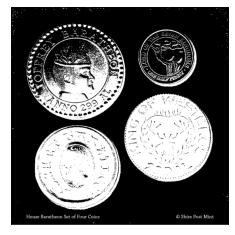

In [27]:
#6 
# Método otsu, dispersión de los niveles de gris (varianza) 
#Calculamos el umbral de binarización: 
umbralotsu=threshold_otsu(grimon)  
#Binarizamos la imagen de escala de grises
bina=grimon<umbralotsu #mascara 1
plt.imshow(bina,cmap='gray')
plt.xticks([]) #forma de quitar ejes 
plt.yticks([])
input("Press Enter to continue..")
#0.5 ?

Press Enter to continue..


''

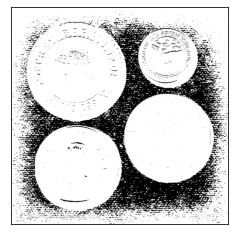

In [8]:
# 7
#Percentil 80 de las intensidades para calcular el umbral 
arreglo=np.array(grimon) 
#Calculamos el umbral de binarización: 
umbralp=np.percentile(arreglo,80)
#Binarizamos la imagen de escala de grises
bina2=grimon<umbralp #mascara 2
plt.imshow(bina2,cmap='gray')
plt.xticks([]) #forma de quitar ejes 
plt.yticks([])
input("Press Enter to continue..")
# es casi 0.78, que significa?

Press Enter to continue..


''

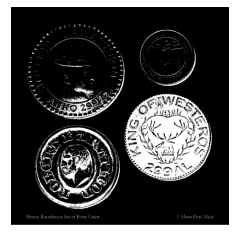

In [42]:
# 8 
#Umbral arbitrario de 0.3
umbralrand=0.3
#Binarizamos la imagen de escala de grises
bina3=grimon<umbralrand #mascara 3
plt.imshow(bina3,cmap='gray')
plt.xticks([]) #forma de quitar ejes 
plt.yticks([])
input("Press Enter to continue..")

Press Enter to continue..


''

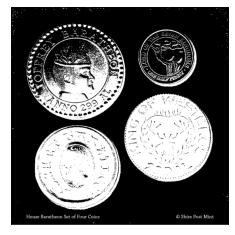

In [50]:
#9 dos umbrales 

#Umbrales de binarización: 
umbralotsu=threshold_otsu(grimon)  
umbralrand=0.3
#Binarizamos la imagen de escala de grises
bina4= grimon<umbralotsu
bina5= bina4>umbralrand  #mascara 4 
plt.imshow(bina5,cmap='gray')
plt.xticks([]) #forma de quitar ejes 
plt.yticks([])

input("Press Enter to continue..")


Press Enter to continue..


''

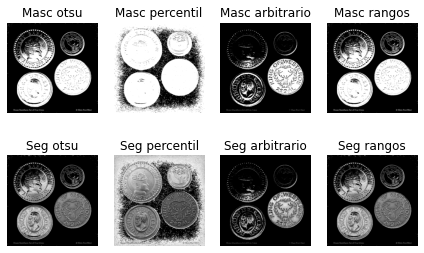

In [61]:
#10-11  utilizamos las 4 mascaras anteriores para aislar las monedas de la imag a escala de grises 
#Nota: recordar que las mascaras son las matrices de binarios


#subplots 
plt.subplots_adjust(wspace=0,hspace=0)

plt.subplot(2,4,1)
plt.imshow(bina,cmap='gray')
plt.axis('off')
plt.title('Masc otsu')

plt.subplot(2,4,2)
plt.imshow(bina2,cmap='gray')
plt.axis('off')
plt.title('Masc percentil')

plt.subplot(2,4,3)
plt.imshow(bina3,cmap='gray')
plt.axis('off')
plt.title('Masc arbitrario')

plt.subplot(2,4,4)
plt.imshow(bina5,cmap='gray')
plt.axis('off')
plt.title('Masc rangos')

#con mascara 1 
plt.subplot(2,4,5)
mult1=np.multiply(bina,grimon)
plt.imshow(mult1,cmap='gray')
plt.axis('off')
plt.title('Seg otsu')

#con mascara 2
plt.subplot(2,4,6)
mult2=np.multiply(bina2,grimon)
plt.imshow(mult2,cmap='gray')
plt.axis('off')
plt.title('Seg percentil')

#con mascara 3 
plt.subplot(2,4,7)
mult3=np.multiply(bina3,grimon)
plt.imshow(mult3,cmap='gray')
plt.axis('off')
plt.title('Seg arbitrario')

#con mascara 4 
plt.subplot(2,4,8)
mult3=np.multiply(bina5,grimon)
plt.imshow(mult3,cmap='gray')
plt.axis('off')
plt.title('Seg rangos')

plt.tight_layout()

plt.savefig('Punto1a3')
input("Press Enter to continue..")